In [32]:
import MDAnalysis as mda
from MDAnalysis.auxiliary import EDR

#Widgets
import ipywidgets as widgets
from ipywidgets import Box

from analysis.modules_file import *

#Math
import numpy as np

# Import viewer
import nglview

import matplotlib.pyplot as plt

#other general things
import warnings
import os

%reload_ext autoreload
%autoreload 2


## Inputs

### Inputs files and options
run the 2 below cells first to select option, and then run the rest

In [33]:
align_traj = widgets.Checkbox(value=True, description='Align Trajectory',disabled=False,indent=False)
radius_of_gyration = widgets.Checkbox(value=True,description='Calculate Radius of Gyration',disabled=False,indent=False)
calculate_RMSD = widgets.Checkbox(value=False, description='Calculate RMSD',disabled=False,indent=False)
calculate_RMSF = widgets.Checkbox(value=False,description='Calculate RMSF',disabled=False,indent=False)
pairwise_RMSD =  widgets.Checkbox(value=False,description='Calculate Pairwise RMSD',disabled=False,indent=False)
optionbox = Box(children=[align_traj,radius_of_gyration,calculate_RMSD,calculate_RMSF,pairwise_RMSD])
optionbox


Box(children=(Checkbox(value=True, description='Align Trajectory', indent=False), Checkbox(value=True, descrip…

In [34]:
edr_only =  widgets.Checkbox(value=False,description='only run EDR analysys',disabled=False,indent=False)
EDRbox = Box(children=[edr_only])
EDRbox

Box(children=(Checkbox(value=False, description='only run EDR analysys', indent=False),))

In [35]:
### Needed input
sim_path = "S:\\Work\\gromacs\\Cr2RBM-2\\"
ligand_name = None #set to None if no ligand
coordinate_file_name = 'md250ns_po_start.pdb'             ##pdb file for dssp to work
trajectory_file_name = 'md250ns_center_po.xtc'      ##xtc file
auxiliary_file_name = 'md250ns.edr'              ##edr file
reference_structure_path = 'md1ns.gro'

sim_name = 'default' ##output pdb file will use thise name, if set to "default" will use the auxilliary file name

#Options
#RMSD_groups = ["284 to 400" , "400 to 426" ]
#RMSD_groups_name = ["Core" , "C-term" ]
RMSD_groups = ["1 to 92"]
RMSD_groups_name = ["all"]
H_bonds = False
start_frame = 100
stop_frame = None



if sim_name == 'default':
    sim_name = auxiliary_file_name.split(".")[0]

RMSD_groups_name.insert(0, "Overall")

if edr_only.value:
    align_traj = None
    radius_of_gyration = None
    calculate_RMSD = None
    calculate_RMSF = None
    pairwise_RMSD =  None


### Reading and preprocessing

In [36]:
## Read the diferents files
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    if not edr_only.value:
        reference_structure = mda.Universe(sim_path + reference_structure_path,)
        if os.path.isfile(sim_path + trajectory_file_name.split(".")[0] + "_aligned.xtc"): ## read the aligned file if it exist
            atomistic_system = mda.Universe(sim_path + coordinate_file_name, sim_path + trajectory_file_name.split(".")[0] + "_aligned.xtc")
            print("Aligned file found, reading this instead")
            is_aligned = True
        else:
            atomistic_system = mda.Universe(sim_path + coordinate_file_name, sim_path + trajectory_file_name)
            is_aligned = False
    energy_like_terms = EDR.EDRReader(sim_path + auxiliary_file_name)

Aligned file found, reading this instead


In [37]:
atomistic_system.trajectory[0]
protein = atomistic_system.select_atoms("protein")
dsspline_start = dssp(protein)
print(dsspline_start)

---------------------------HHHHHHHH-----------------------------------------------------HHHHHHH------------------------E--E-----


c:\Users\Clement\AppData\Local\Programs\Python\Python312\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
c:\Users\Clement\AppData\Local\Programs\Python\Python312\Lib\site-packages\MDAnalysis\coordinates\PDB.py:1200: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


## Sanity Check
Check that simulation isn't going wrong, read temperature and pressure through the EDR <br>
list of the available data can be obtained with: <br>


### Box size

## View the simulation

In [41]:
# Open an NGLView widget
view = nglview.show_mdanalysis(atomistic_system, default_representation=False)
# Add the atomistic system to the widget
view.add_representation('cartoon', selection='protein')

#view.add_representation('licorice', selection='water')

# Add spacefill representtaion for the ions (Potassium, Chloride)
view.add_representation('spacefill', selection='.POT .CLA', opacity=0.5)


# Center the view
if ligand_name:
    try:
        test = atomistic_system.select_atoms(f"resname {ligand_name}")[0] # crash if ligand name corespond to nothing
        view.center(ligand_name)
        view.add_representation('licorice', selection= ligand_name )
    except:
        view.center('protein')
else:
    view.center('protein')

# Set the view to orthographic
view.camera = 'orthographic'

# Show the view in the widget
view

NGLWidget(max_frame=25000)

## Analysis

### Radius of gyration

['SER1', 'SER2', 'SER3', 'ALA4', 'PRO5', 'ALA6', 'ARG7', 'SER8', 'SER9', 'SER10', 'ALA11', 'SER12', 'LYS13', 'LYS14', 'ALA15', 'VAL16', 'THR17', 'PRO18', 'SER19', 'ARG20', 'SER21', 'ALA22', 'LEU23', 'PRO24', 'SER25', 'ASN26', 'TRP27', 'LYS28', 'GLN29', 'GLU30', 'LEU31', 'GLU32', 'SER33', 'LEU34', 'ARG35', 'SER36', 'SER37', 'SER38', 'PRO39', 'ALA40', 'PRO41', 'ALA42', 'SER43', 'SER44', 'ALA45', 'PRO46', 'ALA47', 'PRO48', 'ALA49', 'ARG50', 'SER51', 'SER52', 'SER53', 'ALA54', 'SER55', 'TRP56', 'ARG57', 'ASP58', 'ALA59', 'ALA60', 'PRO61', 'ALA62', 'SER63', 'SER64', 'ALA65', 'PRO66', 'ALA67', 'ARG68', 'SER69', 'SER70', 'SER71', 'SER72', 'LYS73', 'LYS74', 'ALA75', 'VAL76', 'THR77', 'PRO78', 'SER79', 'ARG80', 'SER81', 'ALA82', 'LEU83', 'PRO84', 'SER85', 'ASN86', 'TRP87', 'LYS88', 'GLN89', 'GLU90', 'LEU91', 'GLU92', 'SER93', 'LEU94', 'ARG95', 'SER96', 'SER97', 'SER98', 'PRO99', 'ALA100', 'PRO101', 'ALA102', 'SER103', 'SER104', 'ALA105', 'PRO106', 'ALA107', 'PRO108', 'ALA109', 'ARG110', 'SER111

s:\Work\gromacs\GROMACS-tools\analysis\modules.py:182: SyntaxWarning: invalid escape sequence '\A'
  ax.set(ylabel='Size ($\AA$)', xlim=(0, len(box_Z_data['Time'])/100))
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:210: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel('Rg  ($\AA$)')
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:367: SyntaxWarning: invalid escape sequence '\A'
  ax0.xaxis.set_ticks(np.arange(start, end, 10))
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:482: SyntaxWarning: invalid escape sequence '\A'
  ax.xaxis.set_ticks(np.arange(start, end, 10))
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:648: SyntaxWarning: invalid escape sequence '\A'
  ax.set_xlim(plot_0,len(rmsd[n])/100)


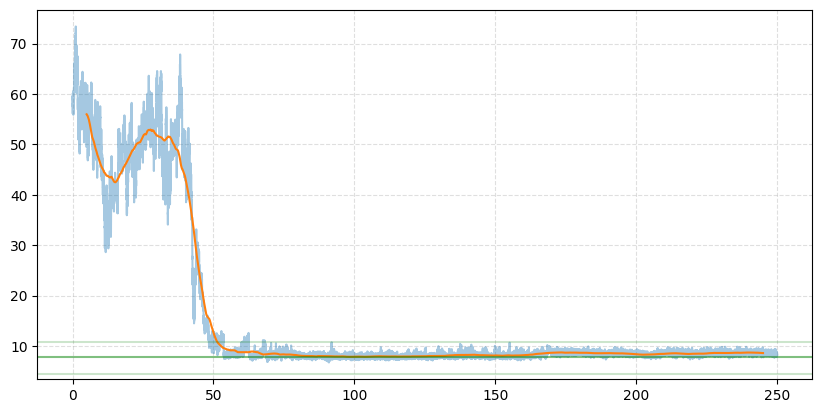

### Salt Bridges formation

s:\Work\gromacs\GROMACS-tools\analysis\modules.py:182: SyntaxWarning: invalid escape sequence '\A'
  ax.set(ylabel='Size ($\AA$)', xlim=(0, len(box_Z_data['Time'])/100))
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:210: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel('Rg  ($\AA$)')
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:362: SyntaxWarning: invalid escape sequence '\A'
  ax0.set_ylabel('Rg  ($\AA$)')
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:477: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel(f'# Charge within {salt_bridge_cutoff} ($\AA$)')
s:\Work\gromacs\GROMACS-tools\analysis\modules.py:643: SyntaxWarning: invalid escape sequence '\A'
  ax.set_ylabel("RMSD  ($\AA$)")


KeyboardInterrupt: 

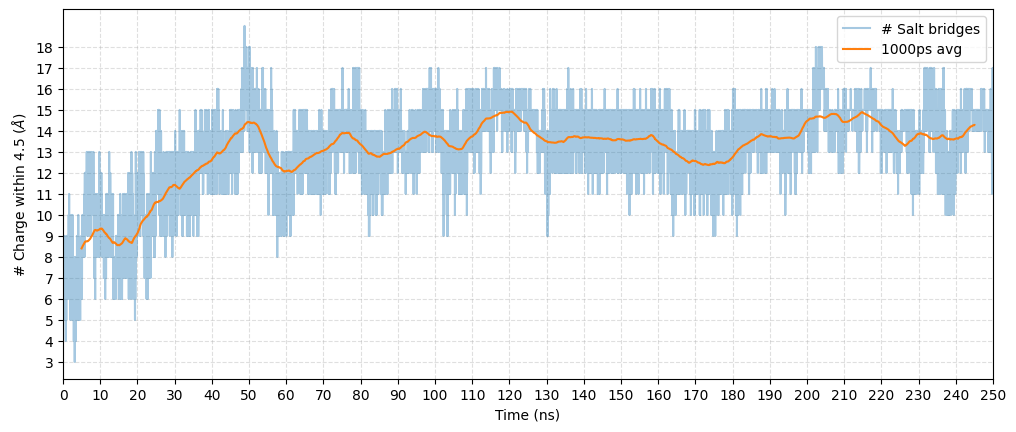

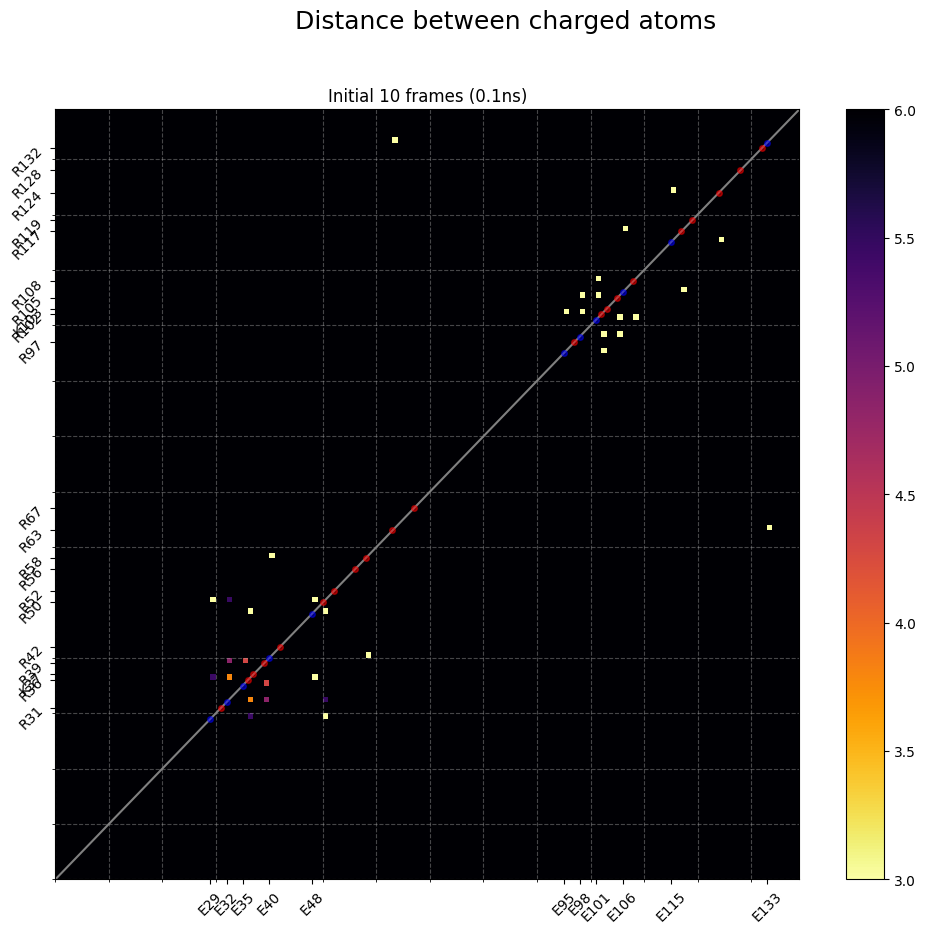

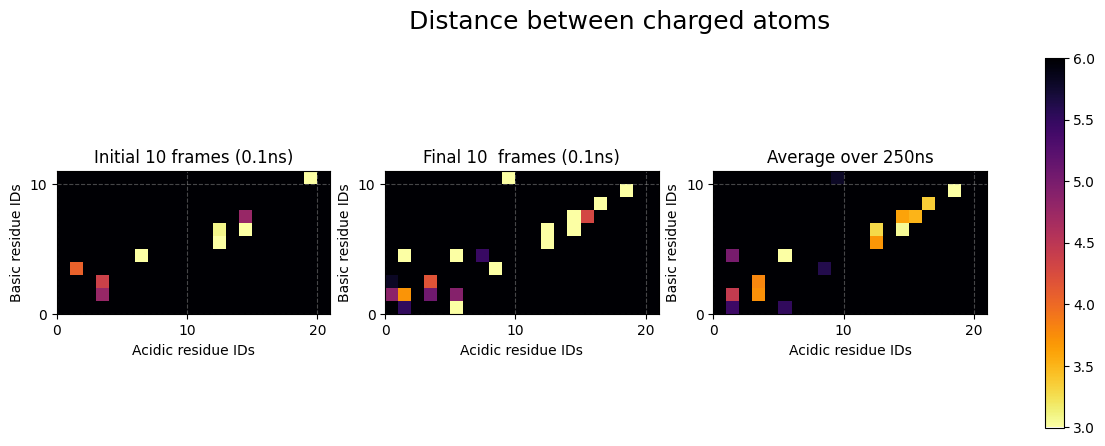

In [ ]:
contact_start = 0
contact_finish = 250
dist_max = 6

import matplotlib as mpl

fig, axes = plt.subplots(1,3)
fig.set(figwidth=15)
fig.suptitle('Distance between charged atoms', fontsize=18)

initial_10frames = np.mean(byresidues_cd_3Darray[contact_start *100 : contact_start *100 + 10], axis=0)
final_10frames = np.mean(byresidues_cd_3Darray[contact_finish *100 -10 :contact_finish *100], axis=0)

im0 = axes[0].pcolormesh(initial_10frames,vmin=3, vmax=dist_max, cmap = plt.cm.inferno_r)
im1 = axes[1].pcolormesh(final_10frames,vmin=3, vmax=dist_max, cmap = plt.cm.inferno_r)

charges_distances_average = np.mean(byresidues_cd_3Darray[contact_start *100 : contact_finish *100], axis=0)                                                 
im2 = axes[2].pcolormesh(charges_distances_average,vmin=3, vmax=dist_max, cmap = plt.cm.inferno_r)
# plt.pcolor gives a rectangular grid by default
# so we need to make our heatmap square
for ax in axes:
    ax.set_aspect('equal')
    ax.set_ylabel('Basic residue IDs')
    ax.set_xlabel('Acidic residue IDs')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 10))
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 10))
    ax.grid(visible = True, linestyle = '--', alpha=0.4)
    
axes[0].set_title('Initial 10 frames (0.1ns)')
axes[1].set_title('Final 10  frames (0.1ns)')
axes[2].set_title(f'Average over {contact_finish - contact_start}ns')

# colorbar
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
plt.colorbar(im2, cax=cax, **kw)

### RMSD
Measure RMS deviation from the original structure during the simulation time


In [ ]:
if calculate_RMSD.value:
 

In [ ]:
if calculate_RMSD.value:


### Pairwise RMSD

In [ ]:
if pairwise_RMSD.value:
    aligner = align.AlignTraj(atomistic_system, atomistic_system, select='name CA',in_memory=False,filename="tmp.xtc")
    aligner.run(verbose=True)

    aligned_atomistic_system = mda.Universe(sim_path + coordinate_file_name,"tmp.xtc")
    matrix = diffusionmap.DistanceMatrix(aligned_atomistic_system, select='name CA')
    matrix.run(verbose=True)
    print(matrix.results.dist_matrix.shape)

In [ ]:
if pairwise_RMSD.value:
    plt.imshow(matrix.dist_matrix, cmap='viridis')
    plt.xlabel('Frame')
    plt.ylabel('Frame')
    plt.colorbar(label=r'RMSD ($\AA$)')



### RMSF
Calculate RMS fluctuation per residues from an <b>average structure</b>.

In [ ]:
# Generate an average structure
if calculate_RMSF.value:

if not is_aligned:
    do_trajectory_CAalignement(atomistic_system, sim_path, trajectory_file_name)
    atomistic_system = mda.Universe(sim_path + coordinate_file_name, sim_path + trajectory_file_name.split(".")[0] + "_aligned.xtc")
    is_aligned = True
    
#Run RMSF analysis
C_alphas = atomistic_system.select_atoms('protein and name CA')
print("Run RMSF calculation")
RMSF = rms.RMSF(C_alphas)
RMSF.run(verbose=True)
if calculate_RMSF.value:
# Plot the data - RMSF against residue index
fig, ax = plt.subplots()

ax.plot(C_alphas.resids, RMSF.results.rmsf, label='RMSF')
# Add axis labels
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF  ($\AA$)')

# Set axis limits
ax.set_xlim(C_alphas.resids[0], C_alphas.resids[-1] )
ax.set_ylim(min(RMSF.results.rmsf))

# plt median and + 1 stdev
plt_median(ax, RMSF.results.rmsf, negative=False, label=True)


# Show legend
plt.legend()
# Show plot
plt.show()
if calculate_RMSF.value:
# dynamically add new attributes
# ('tempfactors' is pre-defined and filled with zeros as default values)
atomistic_system.add_TopologyAttr('tempfactors')
C_alphas.tempfactors = RMSF.results.rmsf


#write PDB file with RMS as B factore
if ligand_name:
    write_group = atomistic_system.select_atoms(f"(protein and name CA) or resname {ligand_name}")
else:
    write_group = C_alphas

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    write_group.write(sim_path + sim_name +  "_RMSF.pdb")


## H-Bonds

In [ ]:
hbonds = False
if H_bonds and ligand_name:
    from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
    hbonds = HBA(universe=atomistic_system, between=["protein", f"resname {ligand_name}"])

# Guess H and accepetors
    protein_H = hbonds.guess_hydrogens("protein")
    protein_acc = hbonds.guess_acceptors("protein")
    ligand_H = hbonds.guess_hydrogens(f"resname  {ligand_name}")
    ligand_acc =  hbonds.guess_acceptors(f"resname {ligand_name}")

    hbonds.hydrogens_sel = f"({protein_H}) or ({ligand_H})"
    hbonds.acceptors_sel = f"({protein_acc}) or ({ligand_acc})"

    hbonds.run(verbose=True, start=start_frame, stop=stop_frame)
if hbonds:
    print(hbonds.results.hbonds.shape)

    plt.plot(hbonds.times, hbonds.count_by_time(), lw=2)

    plt.title("Number of hydrogon bonds over time", weight="bold")
    plt.xlabel("Time (ps)")
    plt.ylabel(r"$N_{HB}$")

    plt.show()

if hbonds:
    for donor, acceptor, count in hbonds.count_by_type():

        donor_resname, donor_type = donor.split(":")
        n_donors = atomistic_system.select_atoms(f"resname {donor_resname} and type {donor_type}").n_atoms

        # average number of hbonds per donor molecule per frame
        mean_count = 2 * int(count) / (hbonds.n_frames * n_donors)  # multiply by two as each hydrogen bond involves two water molecules
        print(f"{donor} to {acceptor}: {mean_count:.2f}")